<a href="https://colab.research.google.com/github/raj075512/check_your_drug_addicted_categroy/blob/main/major_project_patient_condition_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

In [4]:
df=pd.read_csv('/content/drugsComTrain_raw.csv')

In [5]:
df.head(2)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192


In [6]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [7]:
df_train = df[(df['condition']=='Anxiety') | (df['condition']=='Depression')|(df['condition']=='High Blood Pressure')|(df['condition']=='Pain')|(df['condition']=='Bipolar Disorde')]

In [8]:
df.shape


(161297, 7)

In [9]:
df_train.shape

(27663, 7)

In [10]:
X = df_train.drop(['drugName','rating','date','usefulCount','uniqueID'],axis=1)

In [11]:
X.head()

,condition,review
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
11,Depression,"""I have taken anti-depressants for years, with..."
18,Bipolar Disorde,"""I&#039;ve been on every medicine under the su..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
32,Pain,"""I am 30 years old. I had a multiple composite..."


EDA


In [12]:
X.condition.value_counts()

Depression             9069
Pain                   6145
Anxiety                5904
Bipolar Disorde        4224
High Blood Pressure    2321
Name: condition, dtype: int64

In [13]:
X.head()

,condition,review
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
11,Depression,"""I have taken anti-depressants for years, with..."
18,Bipolar Disorde,"""I&#039;ve been on every medicine under the su..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
32,Pain,"""I am 30 years old. I had a multiple composite..."


In [14]:
X.shape


(27663, 2)

In [15]:
df_train.shape

(27663, 7)

In [16]:
X.head()

,condition,review
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
11,Depression,"""I have taken anti-depressants for years, with..."
18,Bipolar Disorde,"""I&#039;ve been on every medicine under the su..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
32,Pain,"""I am 30 years old. I had a multiple composite..."


Segregating the data frame for analysing the individual condition

In [17]:

X_Pain=X[(X['condition']=='Pain')]
X_depression=X[(X['condition']=='Depression')]
X_Anxiety=X[(X['condition']=='Anxiety')]
X_blood_pressure=X[(X['condition']=='High Blood Pressure')]

Representation in the word cloud

In [18]:
from wordcloud import WordCloud

In [19]:
plt.figure(figsize=(20,20))    #text that is Fake news headlines


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [20]:
wc=WordCloud(max_words=500 ,width=1600 ,height=800).generate(" ".join(X_Pain.review))

Text(0.5, 1.0, "cloud word for ' pain '  ")

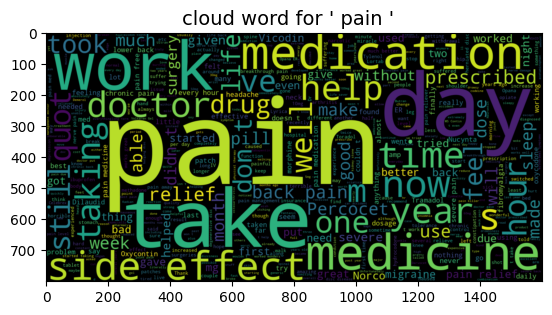

In [21]:
plt.imshow(wc,interpolation="bilinear")
plt.title("cloud word for ' pain '  ",fontsize=14)

get the word cloud for depression

In [22]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1300 ,height=1300, width=1200).generate(" ".join(X_depression.review))


<Figure size 2000x2000 with 0 Axes>

Text(0.5, 1.0, 'cloud for depression ')

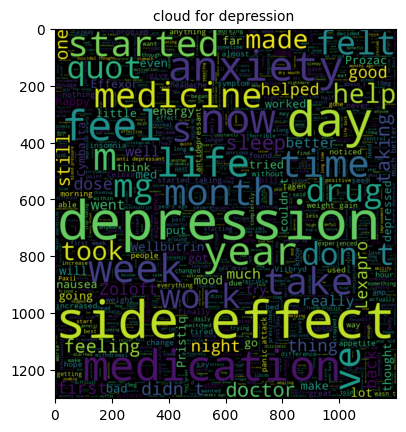

In [23]:
plt.imshow(wc,interpolation="bilinear")
plt.title("cloud for depression ",fontsize=10)

Text(0.5, 1.0, 'cloud for depression ')

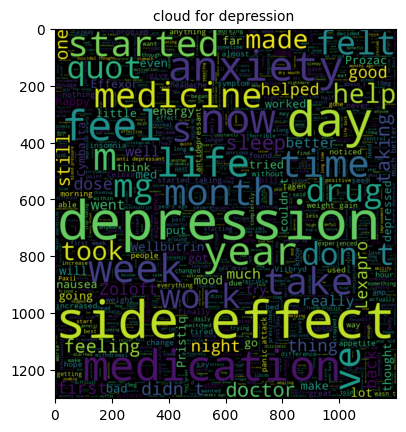

In [24]:
plt.imshow(wc,interpolation="bilinear")
plt.title("cloud for depression ",fontsize=10)

Text(0.5, 1.0, 'cloud for depression ')

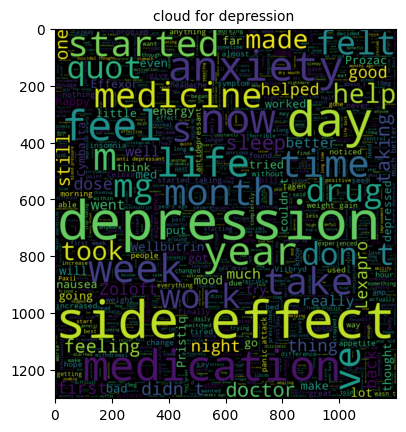

In [25]:
plt.imshow(wc,interpolation="bilinear")
plt.title("cloud for depression ",fontsize=10)

DATA PREPROCESSING

In [26]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [27]:
X.head()

,condition,review
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
11,Depression,"""I have taken anti-depressants for years, with..."
18,Bipolar Disorde,"""I&#039;ve been on every medicine under the su..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
32,Pain,"""I am 30 years old. I had a multiple composite..."


In [28]:
# set the width of the column to maximum
pd.set_option('max_colwidth',-1)

<ipython-input-28-7a238e8c8618>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth',-1)


In [29]:
X.head()

,condition,review
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."""
11,Depression,"""I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."""
18,Bipolar Disorde,"""I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety."""
31,Depression,"""1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."""
32,Pain,"""I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can function again."""


In [30]:
# remove the quote
for i ,col  in enumerate(X.columns):
  X.iloc[:,i]=X.iloc[:,i].str.replace('"','')

In [31]:
X.head()

,condition,review
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
18,Bipolar Disorde,"I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety."
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.
32,Pain,I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can function again.


cleaning the unwanted word -> stopWords

In [50]:
# from nltk.corpus import stopwords
# stop=stopwords.words('english')


import nltk
from nltk.corpus import stopwords
stop=stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
from nltk.stem import WordNetLemmatizer

# Download the WordNet dataset (if not already downloaded)
import nltk
nltk.download('wordnet')

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Lemmatize the word "dog"
word_lemmatized = lemmatizer.lemmatize("troubled")

print(word_lemmatized)
stop

troubled


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
from bs4 import BeautifulSoup
import re

In [46]:
def review_to_words(raw_review):

  # delete HTML
  review_text=BeautifulSoup(raw_review,'html.parser').get_text()

  # make the space
  letters_only= re.sub('[^a-zA-Z]', ' ',review_text)

  # lower letters
  words=letters_only.lower().split()

  #  stopwords
   meaningful_words=[w for w in words if not w in stop]

  #  lemmitization
  lemmitize_words=[lemmatizer.lemmatize(w) for w in meangingful_words]

  # space join words
  return (' '.join(lemmitize_words))




IndentationError: ignored

In [ ]:
X['review_clean']=X['review'].apply(review_to_words)

In [ ]:
X.head()


CREATING features and target variables

In [ ]:
X_feat=X['review_clean']
y=X['condition']

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X_feat,y,stratify=y,test_size=0.2,random_state=0)

In [ ]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plot.cm.Blues):


                          plt.imshow(cm,interpolation='nearest' ,cmap=cmap)
                          plt.title(title)
                          plt.colorbar()
                          tick_marks=np.arange(len(classes))
                          plt.xticks(tick_marks,classes,rotation=45)
                          plt.yticks(tick_marks,classes)

                          if normalize:
                            cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
                            print("Normalized Confusion matrix")
                          else:
                              print("confusion matrix ,without normalization ")

   thresh =cm.max()/2.

   for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
   plt.text(j,i,cm[i,j]),
   horizontalalignment="center",
   color="white" if cm[i,j]>thresh else "black")

   plt.tight_layout()
   plt.ylabel("true lable")
   plt.xlable("prdicted lable")




Bag of words

In [ ]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train =count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

In [ ]:
count_train

Machine learning Model : Naive bayes

In [ ]:
mnb=MultinomialNB()
mnb.fit(count_train,y_train)
pred=mnb.predict(count_test)
score=metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" %score)


cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','High Blood Pressure'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','High Blood Pressure'])

Machine learning model TFIDF

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_text)

pass_tf=PassiveAggressiveClassifer()
pass_tf.fit(tfidf_train,y_train)

pred=pass_tf.predict(tfidf_test)
score=metrics.accuracy_score(y_test,pred)

print("accuracy : %0.3f" %score)

cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','High Blood Pressure'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','High Blood Pressure'])

TFIDF : Bigrams

In [ ]:
tfidf_vectorizer2=TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_text)

pass_tf=PassiveAggressiveClassifer()
pass_tf.fit(tfidf_train,y_train)

pred=pass_tf.predict(tfidf_test)
score=metrics.accuracy_score(y_test,pred)

print("accuracy : %0.3f" %score)

cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','High Blood Pressure'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','High Blood Pressure'])